In [1]:
"""

1. Accept a user's name, age, and a list of their skills.
2. Pass the state through 3 nodes that:
    - first node: Personalizes the name field with a greeting.
    - second node: Describes the user's age.
    - third node: Lists the user's skills in a formatted string.
3. The final output in the result field should be a combined message in this format.

Output: "Linda, welcome to the system! You are 31 years old! You have skills in: Python, MachineLearning, and LangGraph"

"""

'\n\n1. Accept a user\'s name, age, and a list of their skills.\n2. Pass the state through 3 nodes that:\n    - first node: Personalizes the name field with a greeting.\n    - second node: Describes the user\'s age.\n    - third node: Lists the user\'s skills in a formatted string.\n3. The final output in the result field should be a combined message in this format.\n\nOutput: "Linda, welcome to the system! You are 31 years old! You have skills in: Python, MachineLearning, and LangGraph"\n\n'

In [4]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [5]:
class AgentState(TypedDict):
  name: str
  age: str
  skills: List[str]
  result: str

In [7]:
def first_node_greeting(state: AgentState) -> AgentState:
  """ Personalized the name field with a greeting. example: 'name', welcome to the system! """

  state['result'] = f"{state['name']}, welcome to the system! "
  return state

In [8]:
def second_node_age(state: AgentState) -> AgentState:
  """ Describes the user's age. example: You are 'age' years old! """

  state['result'] = state['result'] + f"You are {state['age']} years old! "
  return state

In [15]:
def third_node_skills(state: AgentState) -> AgentState:
  """ Lists the user's skills in a formatted string. example: You have skills in: 'skills' """

  state['result'] = state['result'] + f"You have skills in {", ".join(state['skills'])}"
  return state

In [16]:
graph = StateGraph(state_schema = AgentState)


graph.add_node("first_node_greeting", first_node_greeting)
graph.set_entry_point("first_node_greeting")
graph.add_node("second_node_age", second_node_age)
graph.add_edge("first_node_greeting", "second_node_age")
graph.add_node("third_node_skills", third_node_skills)
graph.add_edge("second_node_age", "third_node_skills")
graph.set_finish_point("third_node_skills")

app = graph.compile()

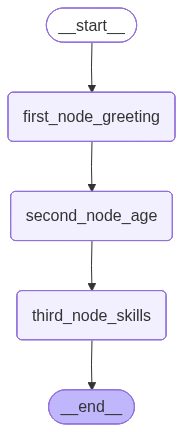

In [17]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
answer = app.invoke({"name": "Linda", "age": "31", "skills": ["Python, Machine Learning, and LangGraph"]})
answer['result']

'Linda, welcome to the system! You are 31 years old! You have skills in Python, Machine Learning, and LangGraph'